# Part 1

In [1]:
# Step 1
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# This is to ignore any worning on outputs.
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../Data/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('./Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./Data/BankChurners.csv


In [2]:
# Importing neccesary packages

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math

In [3]:
# Step 2
full_df = pd.read_csv('./Data/BankChurners.csv')
# we can use print or display 
display(full_df.shape)
# display 5 sample randomly
full_df.sample(5)

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
8270,799242033,Existing Customer,45,M,4,Doctorate,Married,$80K - $120K,Blue,39,...,1438.3,1162,276.3,0.539,4598,86,0.623,0.808,0.000273,0.99973
10015,708964683,Existing Customer,48,F,4,College,Unknown,Unknown,Blue,36,...,3310.0,0,3310.0,0.748,14542,89,0.854,0.000,0.000070,0.99993
750,772684833,Existing Customer,32,F,1,Unknown,Married,Less than $40K,Blue,22,...,2642.0,2035,607.0,1.119,1761,42,0.909,0.770,0.000186,0.99981
9103,713808633,Existing Customer,31,F,0,Uneducated,Divorced,Less than $40K,Silver,23,...,10850.0,1873,8977.0,0.995,13794,127,0.789,0.173,0.000055,0.99995
1568,717385983,Existing Customer,30,M,0,Graduate,Married,Less than $40K,Blue,21,...,2490.0,0,2490.0,0.859,1645,30,0.667,0.000,0.000122,0.99988


In [4]:
# Step 3
# We don't need the unique ids' so droping them
full_df.drop('CLIENTNUM', axis=1, inplace=True)

full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)
full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

display(full_df.shape)

(10127, 20)

In [5]:
# Step 4
# Checking features and target columns
display(full_df.columns)
# Checking dtypes
display(full_df.info())
# Checking numeric values stats
display(full_df.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
# Step 5
# Check the number of records for non numerical columns and plot the countplot for it. 
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
def pltCountplot(cats):
    
    fig, axis = plt.subplots(len(cats) // 2,2, figsize=(20,30))  

    index = 0
    for i in range(len(cats) // 2):
        for j in range(2):
            
            ax = sns.countplot(cats[index], data=full_df, ax=axis[i][j])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(full_df)*100),
                        ha="center") 
            index += 1

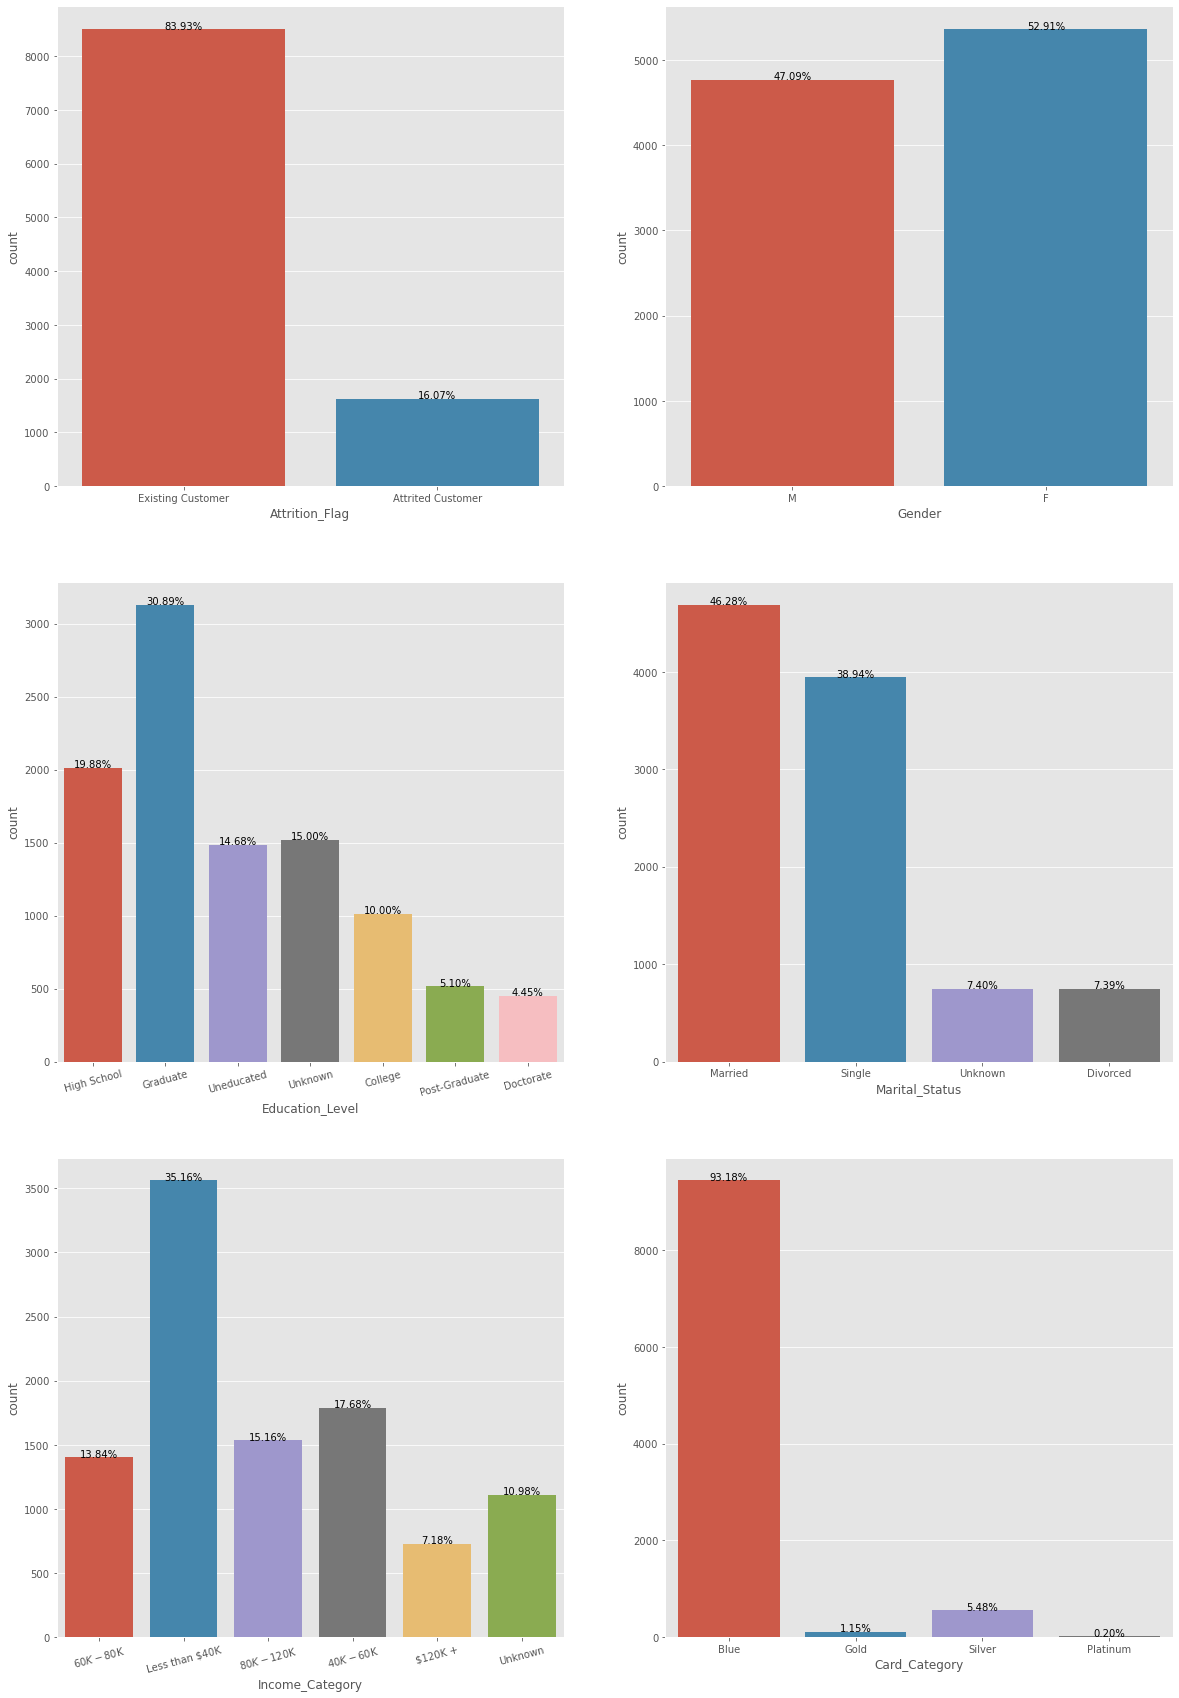

In [7]:
pltCountplot(cats)

In [8]:
# Step 6
# Find the attried customers by Categorical Features and plot the countplot for it. 
def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 2,2, figsize=(20,30))  

    index = 0
    for i in range(len(cats) // 2):
        for j in range(2):
            
            ax = sns.countplot(cats[index], data=full_df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(full_df)*100),
                        ha="center") 
            index += 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


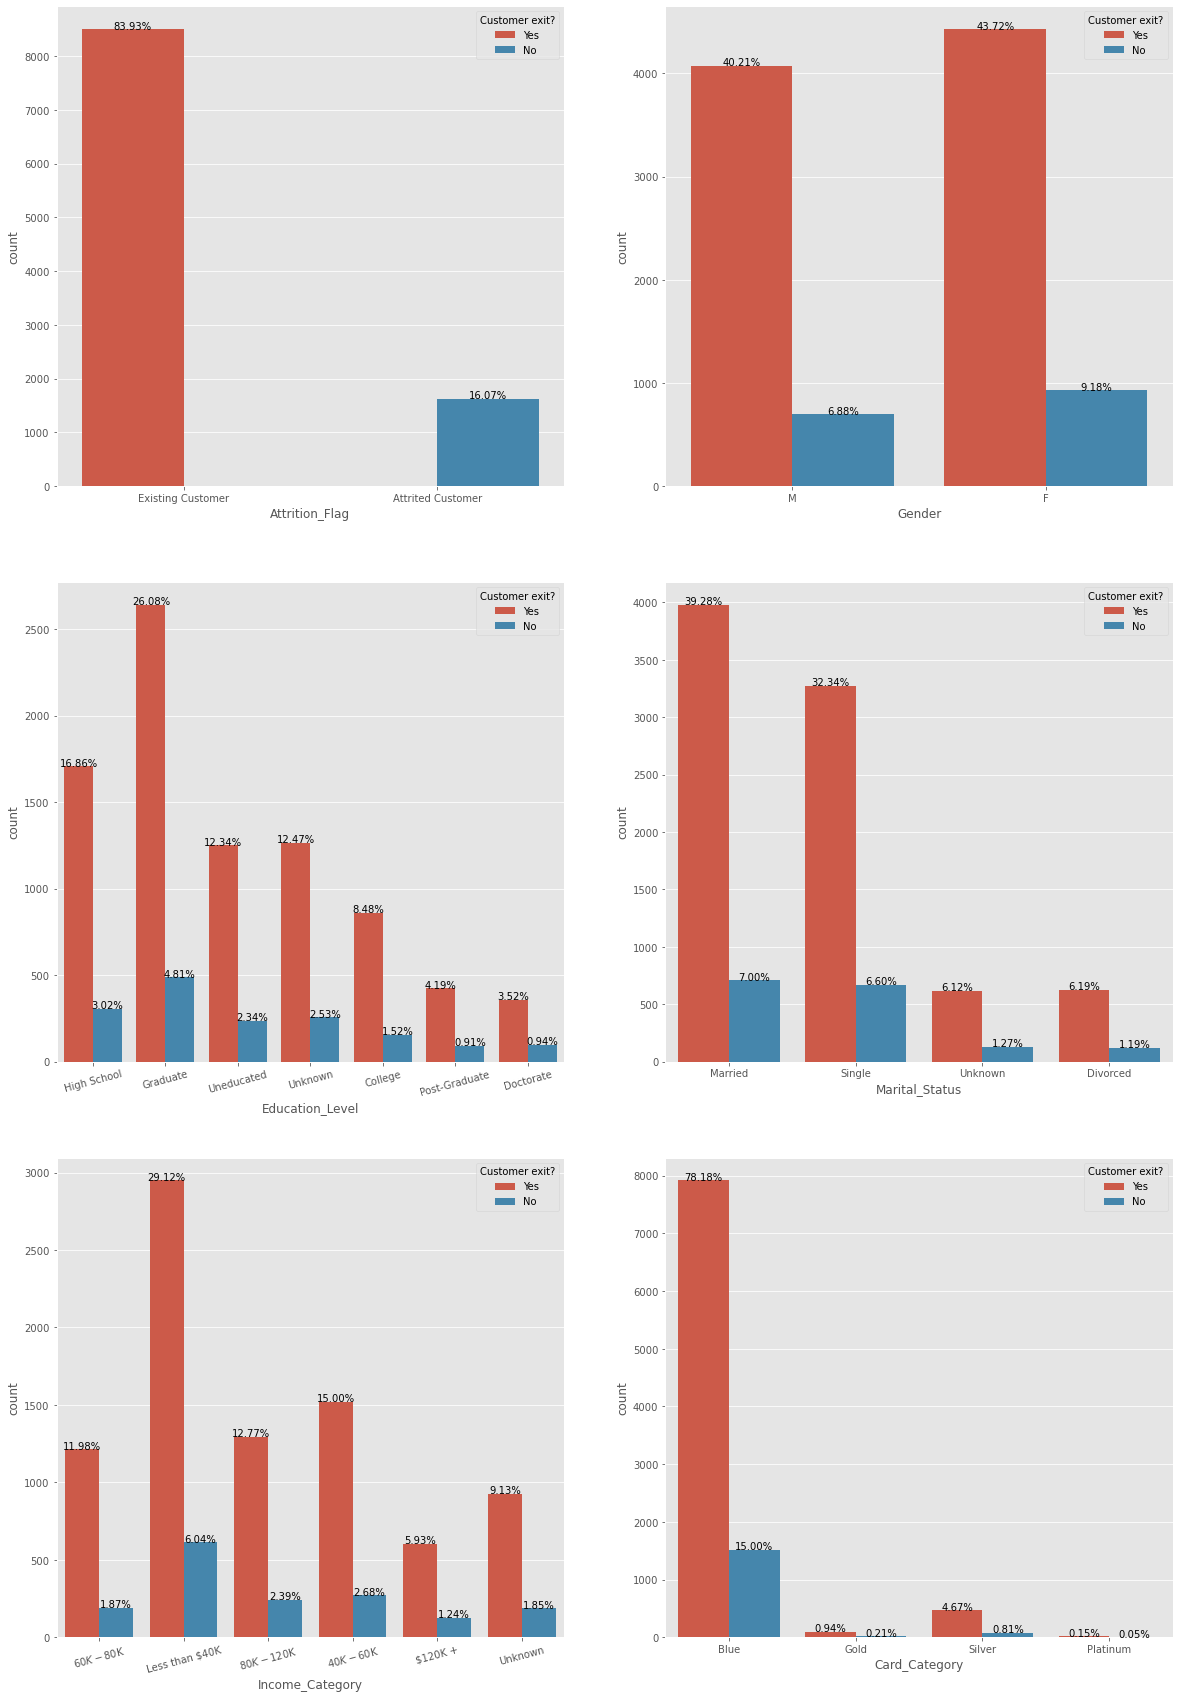

In [9]:
pltCountplotHueTarget(cats, 'Attrition_Flag')

In [10]:
# Step 7
# Plot histogram for all numeric features. 

numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//2, 2,figsize=(30, 30))
    
    index = 0
    for i in range(3):
        for j in range(2):
            sns.distplot(full_df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

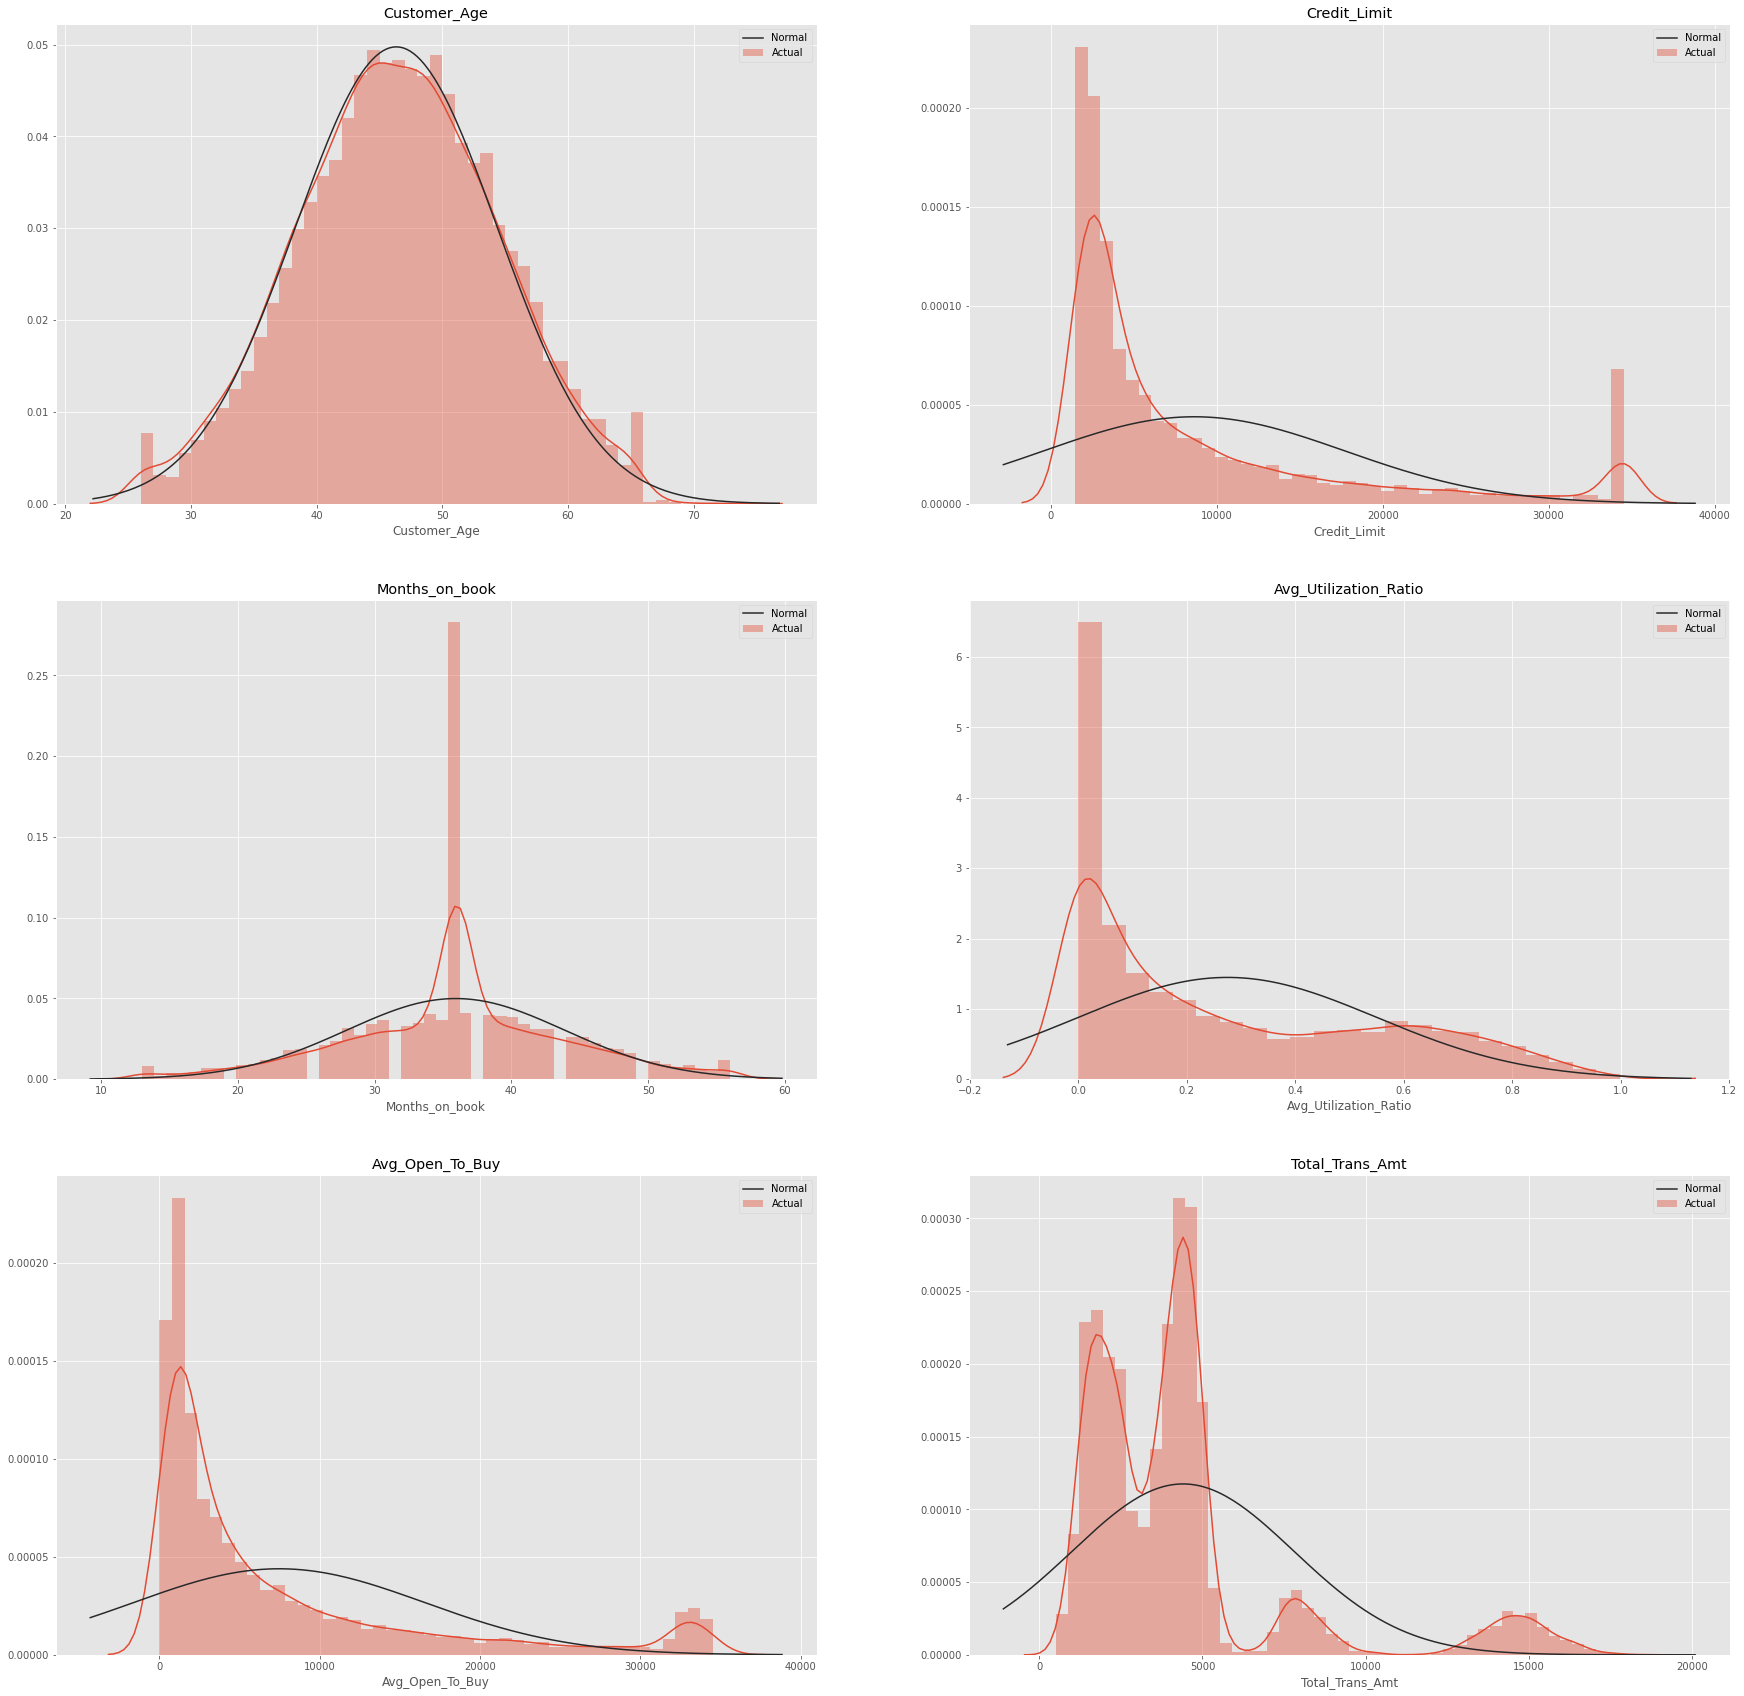

In [11]:
plotDistPlot(some_columns)

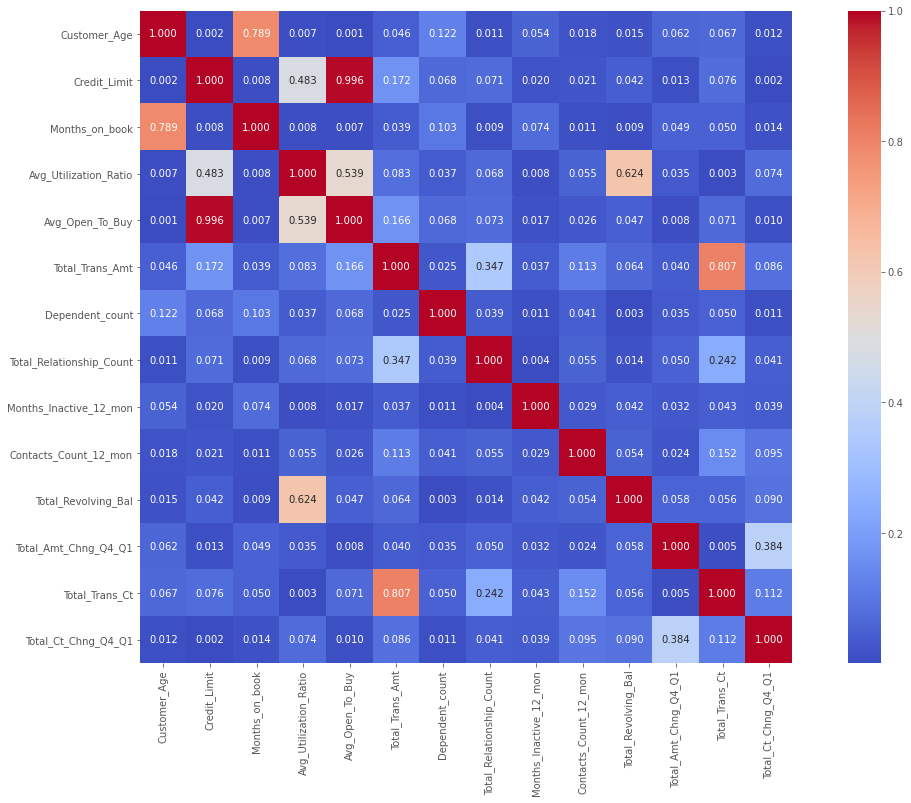

In [12]:
# Step 8
corr_data = full_df.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

# Part 2


### Before we start the Feature selection and ML algorithm. We should convert the works on numeric values. 
### That's why we should transform Object, Category, etc. values to numeric values.

In [13]:
# Step 9
updated_df = pd.DataFrame()

# This metode convert the string to Integer
def tobinary():
    
    # full_df['Attrition_Flag'] = full_df.Attrition_Flag // same thing
    updated_df['Attrition'] = full_df.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
    
    updated_df['Gender'] = full_df.Gender.map({'M':1, 'F':0})

In [14]:
# Step 10
def stringtoint():
    income_data = full_df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
    
    education_data = full_df['Education_Level'].replace({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3,
                                                         'College':4,'Post-Graduate':5,'Doctorate':6})
    
    updated_df['Income_Category'] = income_data
    updated_df['Education_Level'] = education_data

In [15]:
# Step 11
def encode():
    global updated_df
    card_dummies = pd.get_dummies(full_df['Card_Category'], prefix='Card')
    marital_dummies = pd.get_dummies(full_df['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies, card_dummies], axis=1)

In [16]:
# Step 12
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, full_df.loc[:, numeric_columns]], axis=1)

In [17]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [18]:
# Step 13
print('Data shapes """including target value"""')
print(f'Old shape : {full_df.shape}')
print(f'Updated shape : {updated_df.shape}')

Data shapes """including target value"""
Old shape : (10127, 20)
Updated shape : (10127, 26)


In [19]:
updated_df.sample(5)

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
2224,1,0,1,1,0,1,0,0,1,0,...,352.0,3432,3,5,1,3,1694,0.853,49,0.960
857,1,0,1,3,0,0,1,0,1,0,...,7756.0,1537,2,5,3,3,1479,0.843,49,0.581
650,1,0,0,5,1,0,0,0,0,0,...,32938.0,1929,3,3,1,2,1578,0.725,40,0.481
1154,1,0,1,5,0,0,0,1,1,0,...,1438.3,1338,2,4,3,4,0,0.700,28,0.867
2811,1,1,3,2,0,1,0,0,1,0,...,6993.0,4101,2,6,3,3,2140,0.649,88,0.630


In [20]:
updated_df.describe()

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.072578,2.179125,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,...,7469.139637,4404.086304,2.346203,3.812580,2.341167,2.455317,1162.814061,0.759941,64.858695,0.712222
std,0.367235,0.499178,1.461929,1.576387,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,...,9090.685324,3397.129254,1.298908,1.554408,1.010622,1.106225,814.987335,0.219207,23.472570,0.238086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,510.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1324.500000,2155.500000,1.000000,3.000000,2.000000,2.000000,359.000000,0.631000,45.000000,0.582000
50%,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,3474.000000,3899.000000,2.000000,4.000000,2.000000,2.000000,1276.000000,0.736000,67.000000,0.702000
75%,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,9859.000000,4741.000000,3.000000,5.000000,3.000000,3.000000,1784.000000,0.859000,81.000000,0.818000
max,1.000000,1.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,34516.000000,18484.000000,5.000000,6.000000,6.000000,6.000000,2517.000000,3.397000,139.000000,3.714000


In [21]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Income_Category           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Marital_Divorced          10127 non-null  uint8  
 5   Marital_Married           10127 non-null  uint8  
 6   Marital_Single            10127 non-null  uint8  
 7   Marital_Unknown           10127 non-null  uint8  
 8   Card_Blue                 10127 non-null  uint8  
 9   Card_Gold                 10127 non-null  uint8  
 10  Card_Platinum             10127 non-null  uint8  
 11  Card_Silver               10127 non-null  uint8  
 12  Customer_Age              10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Months

## Let's start Feature selection 

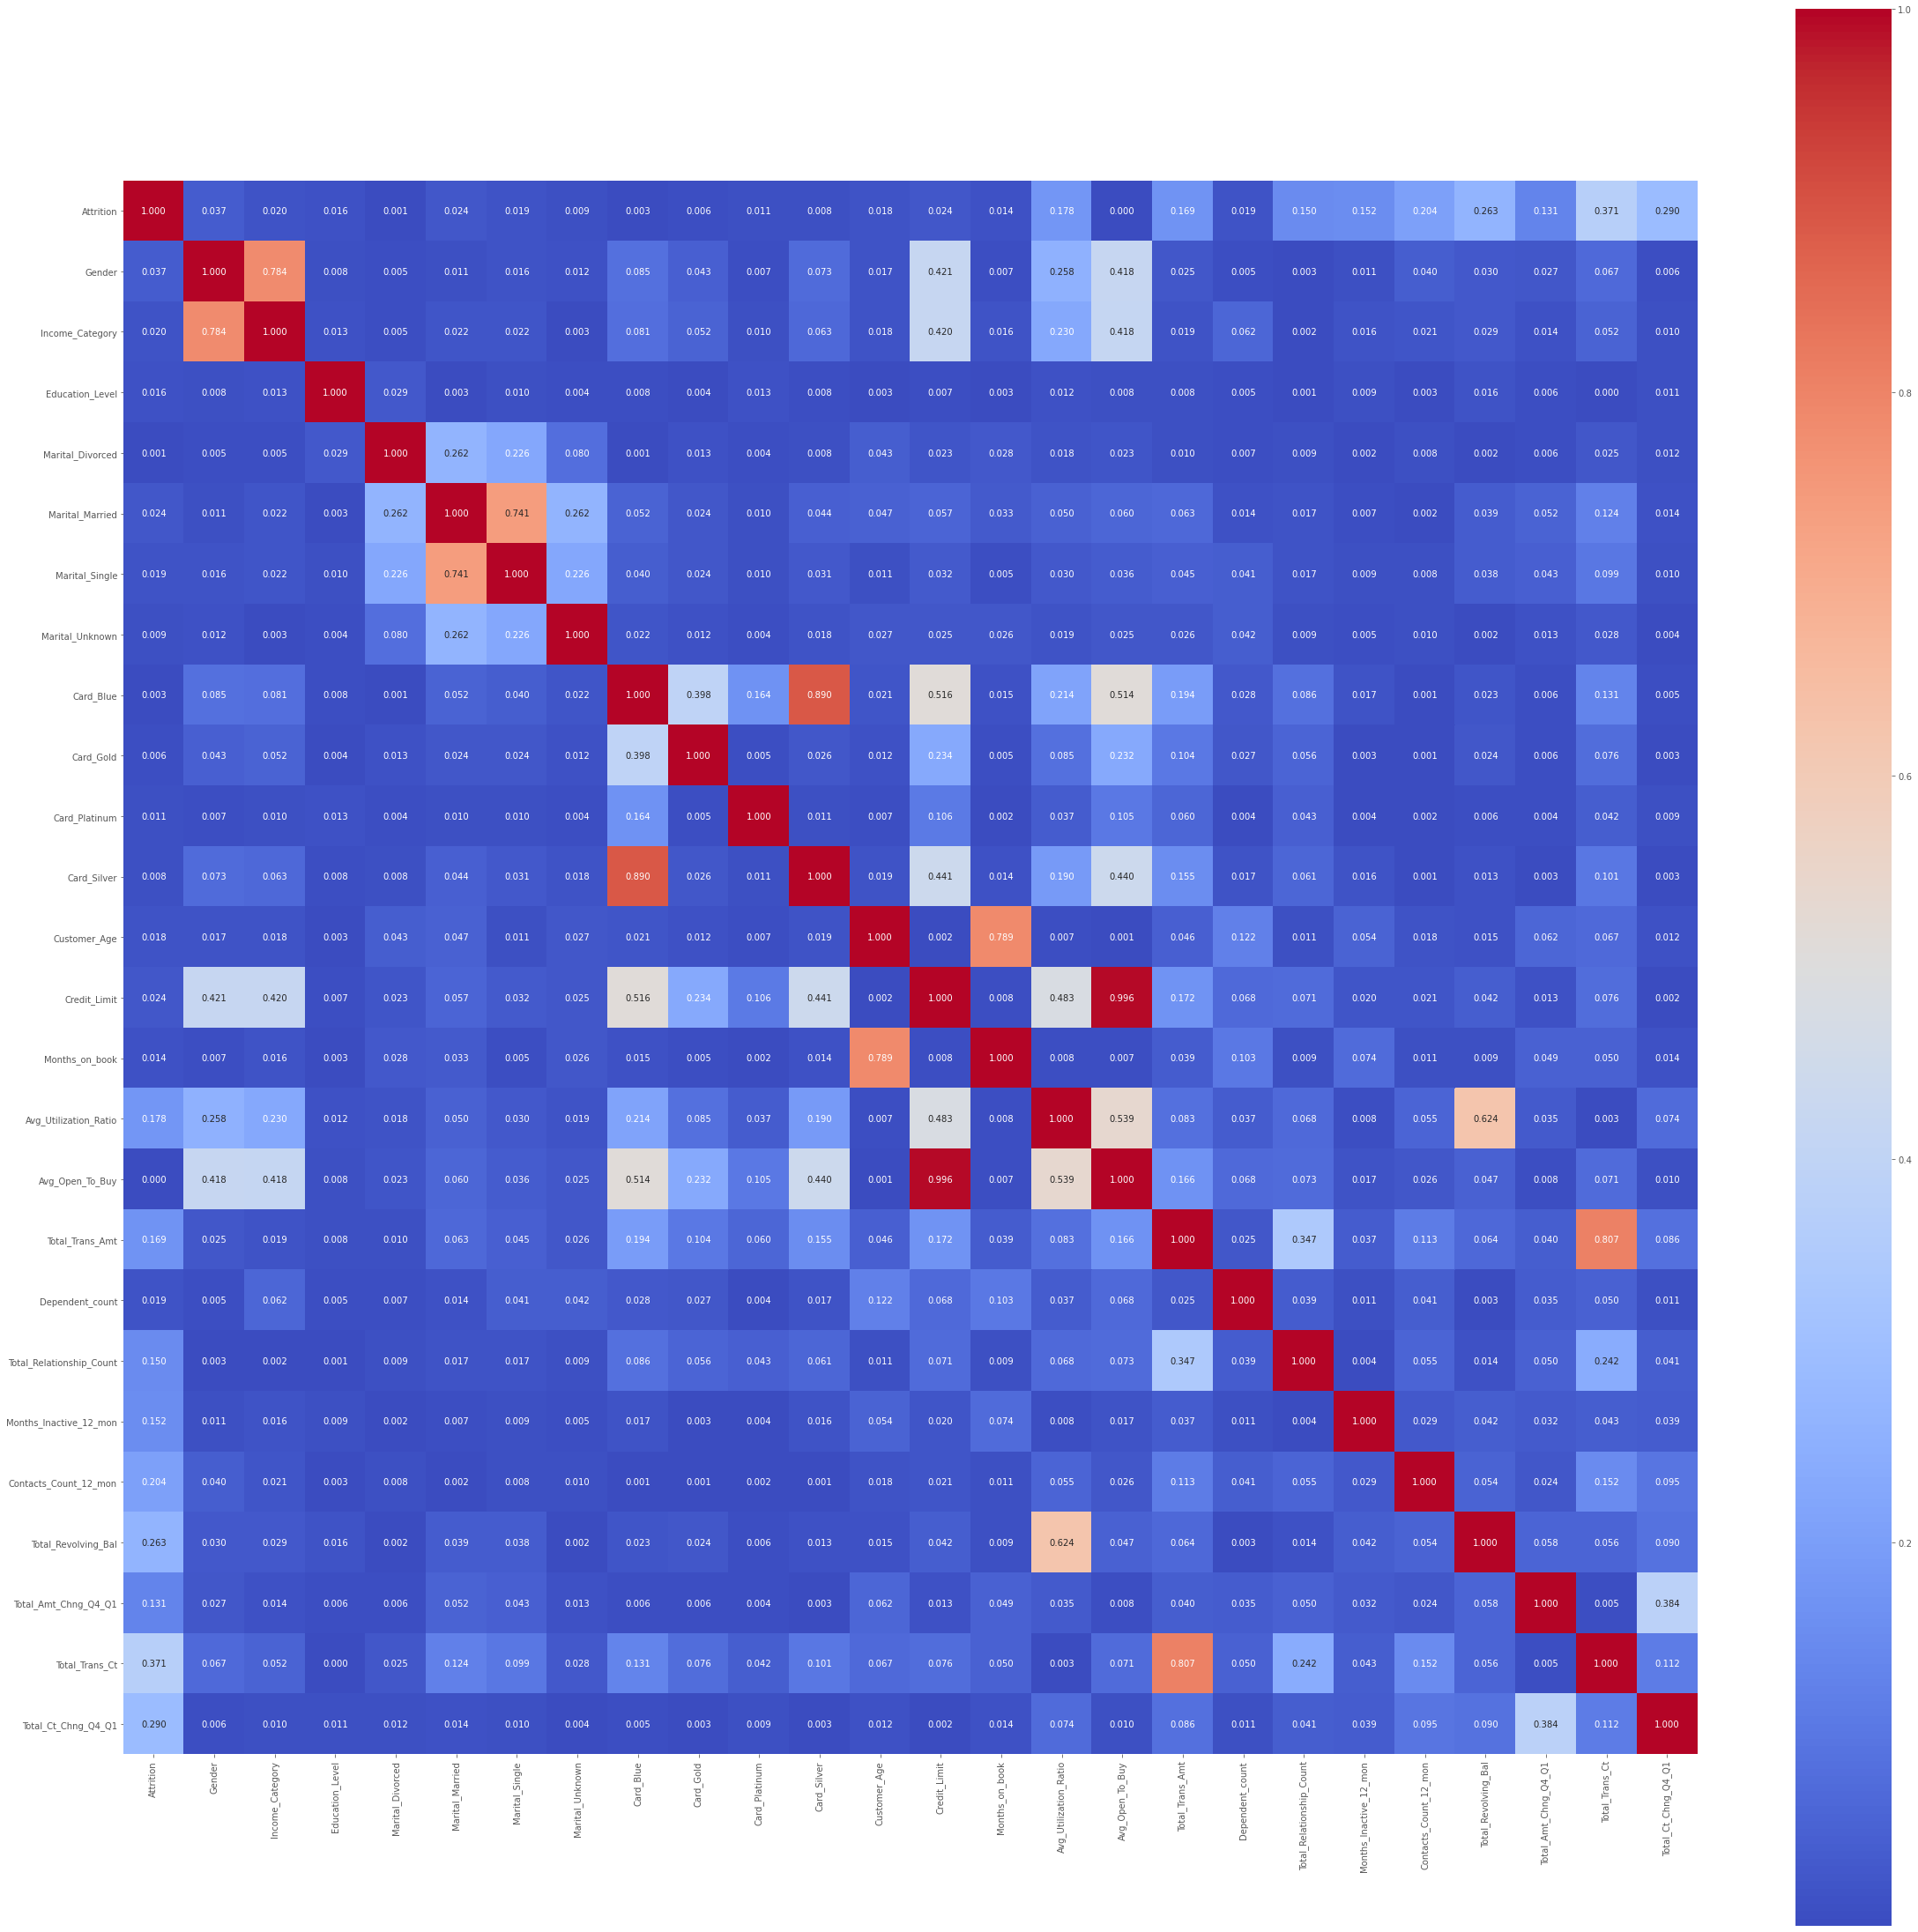

In [22]:
# Step 14

corr_data = updated_df.loc[:,:].corr()

plt.figure(figsize=(40,40))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()


### From the above correlation heat map below are the list of attributes I am going to use for ML.

 - Gender   
 - Income_Category 
 - Marital_Married    
 - Marital_Single    
 - Card_Blue  
 - Card_Silver  
 - Customer_Age 
 - Months_on_book
 - Total_Trans_Amt
 - Total_Trans_Ct
 

In [23]:
feature_selection_df = updated_df[['Gender','Income_Category','Marital_Married','Marital_Single','Card_Blue',
                                   'Card_Silver','Customer_Age','Months_on_book','Total_Trans_Amt','Total_Trans_Ct']]

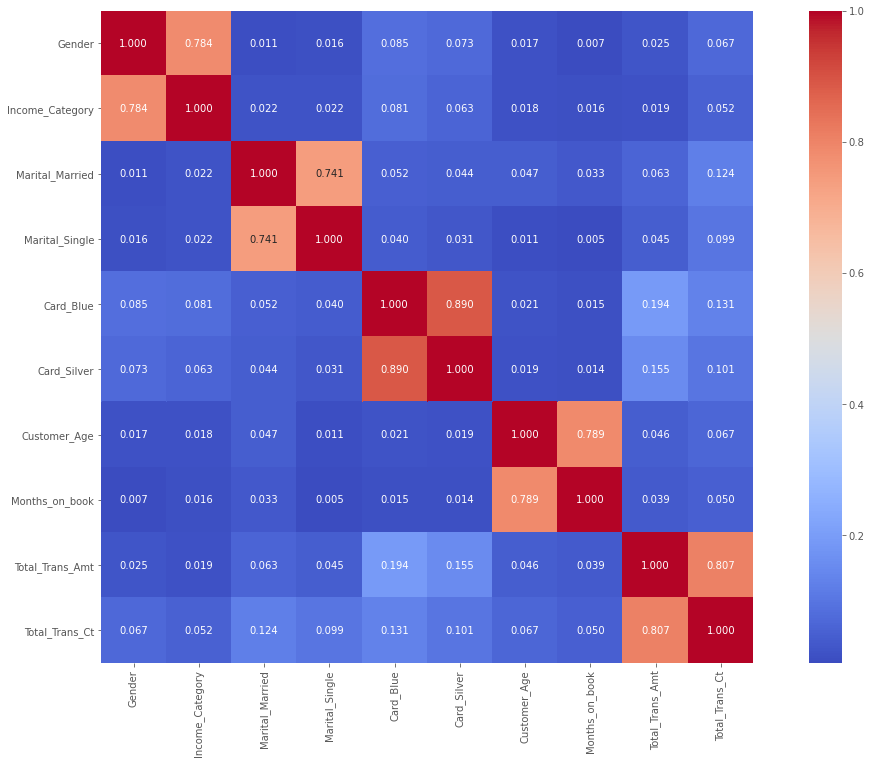

In [24]:
# Step 15
corr_data = feature_selection_df.loc[:, :].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

# Part 3

Create Part III of your analysis case study project. In Part III, begin the process of model evaluation and selection (feel free to modify this later if necessary). You can use any methods/tools you think are most appropriate. Like in Parts I & II, this may look very different from the tutorial case study. In addition, write step-by-step instructions for performing the model evaluation and selection part of your case study.

Submit Parts I, II, and III of your case study to the to the submission link. Include your narrative, data, notebook (if applicable), and code.
Post your entire case study, excluding code, to the Case Study Part III discussion forum.

In [25]:
# Step 16
# Importing packages for modelling.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [26]:
# Step 17
# This method evaluate the model and calculate the scores of train account data and test account data
def estimates(X_data, y_data, models, cv):
    
    # Create dictonary to store the results
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in models:
        
        current_model_name = model.__class__.__name__
        # Corss validate the model with multiple folds (cv) for all data and Attrition column 
        cv_results = cross_validate(model, X_data, y_data, cv=cv,
                                    return_train_score=True, scoring='accuracy')
        
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [27]:
# Step 18
# Create Logistic Regression model object
m_logreg = LogisticRegression()

# Information about the parameter passed to RandomForestClassifier and the explanation
# criterion : The function to measure the quality of a split. Supported criteria are
#    "gini" for the Gini impurity and "entropy" for the information gain.
#    Note: this parameter is tree-specific.

#n_estimators : int, default=100
#    The number of trees in the forest.

# max_depth : int, default=None
#     The maximum depth of the tree. If None, then nodes are expanded until
#     all leaves are pure or until all leaves contain less than
#     min_samples_split samples.

# random_state : int or RandomState, default=None
#     Controls both the randomness of the bootstrapping of the samples used
#     when building trees (if ``bootstrap=True``) and the sampling of the
#     features to consider when looking for the best split at each node
#     (if ``max_features < n_features``).
#     See :term:`Glossary <random_state>` for details.
    
m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)

# Create Gaussian Naive Bayes model object
m_gnb = GaussianNB()


In [28]:
# Step 19

# Provides train/test indices to split data in train/test sets.
# This cross-validation object is a variation of KFold that returns
# Stratified folds. The folds are made by preserving the percentage of
# Samples for each class.

cv = StratifiedKFold(11, shuffle=True, random_state=14)
# Create array of models 
models = [m_logreg,m_rfc,m_gnb ]

# Seperation of Attrition data from datafram in two parts
X = updated_df.drop('Attrition', axis=1)
# the y attribute contains the 0 and 1 values 
y = updated_df['Attrition']

print(X.shape)
print(y.shape)
# Get ef
train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

(10127, 25)
(10127,)


In [47]:
X

,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,1,4,1,0,1,0,0,1,0,0,...,11914.0,1144,3,5,1,3,777,1.335,42,1.625
1,0,1,2,0,0,1,0,1,0,0,...,7392.0,1291,5,6,1,2,864,1.541,33,3.714
2,1,3,2,0,1,0,0,1,0,0,...,3418.0,1887,3,4,1,0,0,2.594,20,2.333
3,0,1,1,0,0,0,1,1,0,0,...,796.0,1171,4,3,4,1,2517,1.405,20,2.333
4,1,4,3,0,1,0,0,1,0,0,...,4716.0,816,3,5,1,0,0,2.175,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,2,2,0,0,1,0,1,0,0,...,2152.0,15476,2,3,2,3,1851,0.703,117,0.857
10123,1,2,0,1,0,0,0,1,0,0,...,2091.0,8764,2,4,2,3,2186,0.804,69,0.683
10124,0,1,1,0,1,0,0,1,0,0,...,5409.0,10291,1,5,3,4,0,0.819,60,0.818
10125,1,2,2,0,0,0,1,1,0,0,...,5281.0,8395,2,4,3,3,0,0.535,62,0.722


In [48]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition, Length: 10127, dtype: int64

## Model Results

In [29]:
# Step 20
# Training accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.1%
RandomForestClassifier - 91.2%
GaussianNB - 89.7%


In [30]:
# Step 21
# Test accuracy
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.0%
RandomForestClassifier - 91.0%
GaussianNB - 89.7%


In [31]:
# Step 22
# Function to create bar-chart for each module accuracy train accounts and test accounts
def result_barplots(result_1, result_2, ylabel_1 = 'Score', ylabel_2 = 'Score'):
    
    current_df_1 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_1:list(result_1.values())})
    current_df_2 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_2:list(result_1.values())})
    
    current_df_1 = current_df_1.sort_values(by=ylabel_1, ascending=False)
    current_df_2 = current_df_2.sort_values(by=ylabel_2, ascending=False)
    
    fig, ax = plt.subplots(1,2,figsize=(18,9), constrained_layout=True)
    
    for i in range(2):
        for item in ax[i].get_xticklabels():
            item.set_rotation(45)
    
    sns.barplot('Model',ylabel_1,data=current_df_1,ax=ax[0])
    sns.barplot('Model',ylabel_2,data=current_df_2,ax=ax[1])
    

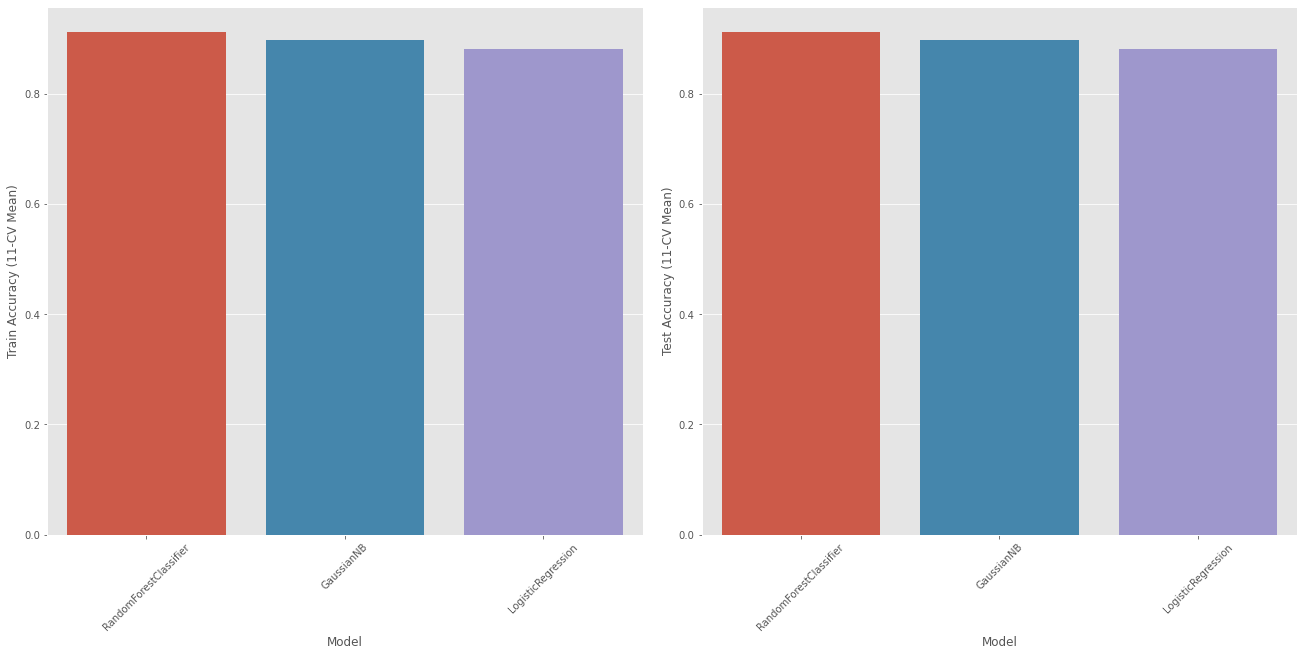

In [32]:
# Step 23
# Call function to plot a grahp
result_barplots(train_acc_dict, test_acc_dict, 'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

## Part 4

In [33]:
# Step 24
# As per multiple comments by colleagues and professor adding confusion matrix.

In [42]:
train_acc_dict


{'LogisticRegression': 0.880951878232117,
 'RandomForestClassifier': 0.9120173919135198,
 'GaussianNB': 0.8969981384644015}

In [43]:
test_acc_dict

{'LogisticRegression': 0.8799261200018883,
 'RandomForestClassifier': 0.9098462317553097,
 'GaussianNB': 0.896910258225936}

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets


In [49]:
# Create training and test set
feature_train , feature_test, target_train, target_test = train_test_split( X, y, random_state = 1)

In [50]:
feature_train

,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
4477,0,0,3,0,0,1,0,1,0,0,...,17116.0,4473,3,4,2,3,940,0.629,72,0.600
5191,0,0,1,1,0,0,0,1,0,0,...,7939.0,2269,3,4,3,6,0,0.551,42,0.312
2150,1,1,5,0,1,0,0,1,0,0,...,5946.0,1793,1,5,1,2,1227,0.646,33,0.737
1821,0,1,1,0,0,1,0,1,0,0,...,2172.0,2780,2,6,2,4,1414,0.745,57,0.727
9127,0,0,3,0,0,1,0,0,0,1,...,34516.0,8416,3,2,3,2,0,0.887,93,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,3,0,0,0,1,0,1,0,0,...,10054.0,1976,1,3,1,4,1319,0.693,35,0.750
7813,0,1,2,0,1,0,0,1,0,0,...,761.0,4268,5,2,5,2,1392,0.787,85,0.667
905,1,5,3,0,0,1,0,1,0,0,...,16868.0,940,2,3,3,1,0,0.938,25,0.471
5192,0,1,2,0,0,1,0,1,0,0,...,968.0,4193,3,3,2,2,1587,1.088,79,0.881


In [51]:
feature_test

,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
6498,0,1,2,0,1,0,0,1,0,0,...,463.0,4058,2,6,3,2,2107,0.651,83,0.766
9013,0,1,4,0,0,0,1,1,0,0,...,1350.0,8677,1,2,3,3,1259,0.871,96,0.627
2053,1,4,4,0,1,0,0,1,0,0,...,8810.0,1683,2,6,3,2,1061,0.545,34,0.478
3211,1,5,2,0,1,0,0,1,0,0,...,31999.0,4228,4,6,3,4,2517,0.765,83,0.596
5559,0,1,6,0,1,0,0,1,0,0,...,1614.0,2437,2,5,2,4,0,0.609,46,0.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7502,0,2,0,0,0,1,0,1,0,0,...,6056.0,4792,4,6,2,3,1326,0.806,65,0.667
6390,0,1,0,0,1,0,0,1,0,0,...,214.0,4869,1,6,3,3,2094,0.722,77,0.750
2347,1,5,0,0,1,0,0,1,0,0,...,21881.0,1591,1,6,2,4,1967,0.462,43,0.720
5340,0,1,6,0,0,1,0,1,0,0,...,1864.0,4990,4,3,2,2,901,0.898,80,0.905


In [52]:
target_train

4477    1
5191    0
2150    1
1821    1
9127    1
       ..
2895    1
7813    1
905     0
5192    1
235     1
Name: Attrition, Length: 7595, dtype: int64

In [53]:
target_test

6498    1
9013    1
2053    1
3211    1
5559    0
       ..
7502    1
6390    1
2347    1
5340    1
9126    1
Name: Attrition, Length: 2532, dtype: int64

In [106]:
#Step 25 
# This method plots the confusion matrix for given model


def plotConfusionMatrix( model , string ): 
    # Use fit to crete predicted target for feature_train and target_train and feature_test
    target_predicted = model.fit(feature_train , target_train).predict(feature_test)
    # Create confusion metrix for target test data and target predicted data
    metrix = confusion_matrix(target_test,target_predicted)
    
    # Create data frame with metrix for Attrited Customer and Existing Customer
    dataframe = pd.DataFrame(metrix , index = ['Attrited Customer','Existing Customer'] , columns = ['Attrited Customer','Existing Customer'])

    # Plot a heatmap with above dataframe
    sns.heatmap( dataframe , annot=True , fmt = '.5g', cbar = None , cmap = "Reds")
    plt.title("Confusion Metrix for "+ string) 
    plt.tight_layout()
    plt.xlabel("Predicted Class" )
    plt.ylabel("True Class" )
    plt.show()

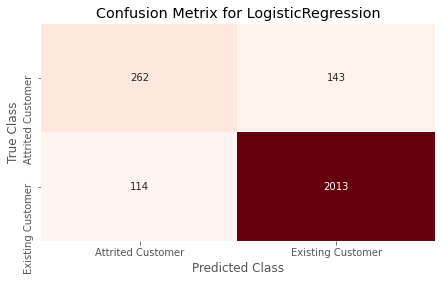

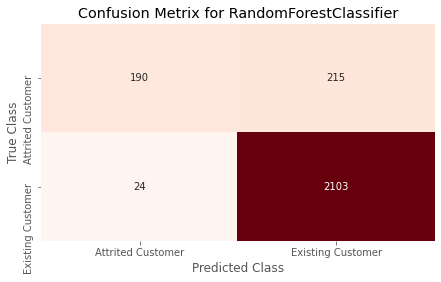

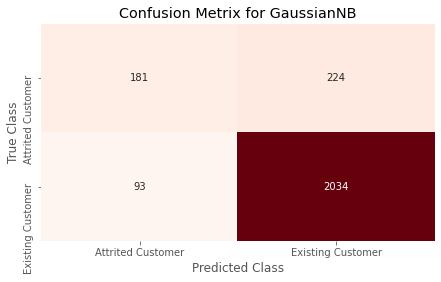

In [107]:

m_gnb, m_rfc, m_logreg
plotConfusionMatrix(m_gnb , "LogisticRegression")
plotConfusionMatrix(m_rfc , "RandomForestClassifier")
plotConfusionMatrix(m_logreg , "GaussianNB")

#### From above confusion matrix for LogisticRegression, RandomForestClassifier and GaussianNB
#### My observation says 
- The LogisticRegression model predicted the 114 existing customer as attrited customers and 143 attrited customers as existing customer
-  The RandomForestClassifier model predicted the 24 existing customer as attrited customers and 215 attrited customers as existing customer
- The GaussianNB model predicted the 93 existing customer as attrited customers and 224 attrited customers as existing customer

As per accuracy the RandomForestClassifier should perform best but LogisticRegression model is performing better that other models. 

# Conclusion

## I am lucky I found really nice dataset and I could analyze the data and applied all my understanding which I learnt as part of this subject. I am really happy. 

## As part of this analysis I used multiple models like LogisticRegression, RandomForestClassifier and GaussianNB.  Overall Random Forest Classifier seems more accurate overall. It is also more accurate in Existing customer findings and not recommended to find the attrited customers. However, Logistic Regression has more accuracy in terms of True or Recommended Scenarios.



## Definitely, I don't want to say my model is 100% accurate. I feel as a beginner model is really performing well. Definitely there is scope of improvement and best practices to get better results. I feel there is scope of improvement of feature selection. This could make model more tuned. 

## Definitely we can use this model to reduce the attrited customers and save the credit card company problem. 
